Sanity Check
--

Fit some approximations to a model with a *Gaussian* likelihood. Make sure they're all the same. 

In [1]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

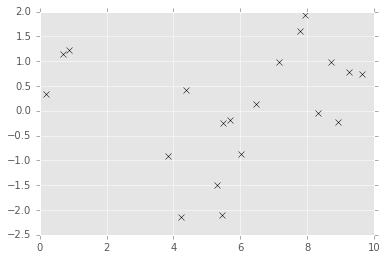

In [2]:
np.random.seed(0)
X = np.random.rand(20,1)*10
Y = np.sin(X) + 0.9 * np.cos(X*1.6) + np.random.randn(*X.shape)* 0.8
Xtest = np.random.rand(10,1)*10
plt.plot(X, Y, 'kx')

In [3]:
m1 = GPflow.gpr.GPR(X, Y, kern=GPflow.kernels.RBF(1))
m2 = GPflow.vgp.VGP(X, Y, GPflow.kernels.RBF(1), likelihood=GPflow.likelihoods.Gaussian())
m3 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1),
                      likelihood=GPflow.likelihoods.Gaussian(),
                      Z=X.copy(), q_diag=False)
m3.Z.fixed = True
m4 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1),
                      likelihood=GPflow.likelihoods.Gaussian(),
                      Z=X.copy(), q_diag=False, whiten=True)
m4.Z.fixed=True
m5 = GPflow.sgpr.SGPR(X, Y, GPflow.kernels.RBF(1), Z=X.copy())
m5.Z.fixed = True
m6 = GPflow.sgpr.GPRFITC(X, Y, GPflow.kernels.RBF(1), Z=X.copy())
m6.Z.fixed = True

In [4]:
m6.optimize()
m1.optimize()
m2.optimize()
m3.optimize()
m4.optimize()
m5.optimize()


compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 27.80752042])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.48483567e-06,  -1.49310422e-06,   1.23865561e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 8
   status: 0
  success: True
        x: array([-0.10891309, -0.16744766,  0.86704403])

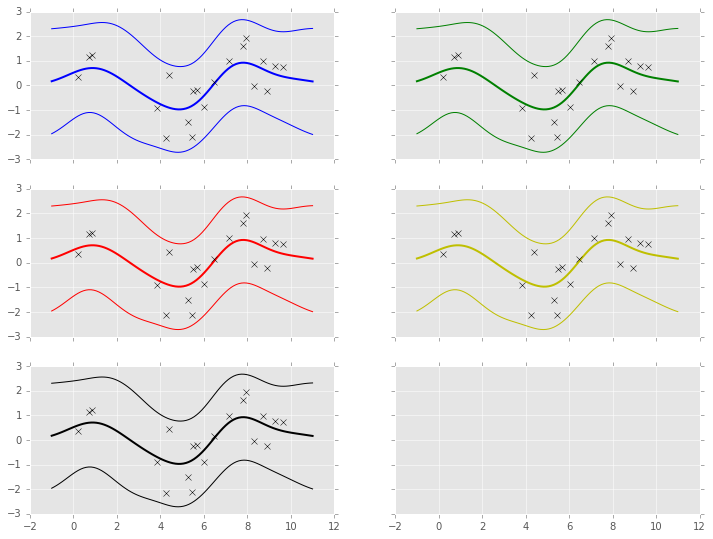

In [5]:
xx = np.linspace(-1, 11, 100)[:,None]


def plot(m, color, ax):
    mu, var = m.predict_y(xx)
    ax.plot(xx, mu, color, lw=2)
    ax.plot(xx, mu+ 2*np.sqrt(var), color, xx, mu-2*np.sqrt(var), color, lw=1)
    ax.plot(X, Y, 'kx')

f, ax = plt.subplots(3,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'b', ax[0,0])
plot(m2, 'r', ax[1,0])
plot(m3, 'g', ax[0,1])
plot(m4, 'y', ax[1,1])
plot(m5, 'k', ax[2,0])

In [6]:
m1.kern

Name,values,prior,constriant
kern.variance,[ 0.61292386],None,+ve
kern.lengthscales,[ 1.21783295],None,+ve


In [7]:
m2.kern

Name,values,prior,constriant
kern.variance,[ 0.6128738],None,+ve
kern.lengthscales,[ 1.21769878],None,+ve


In [8]:
m3.kern

Name,values,prior,constriant
kern.variance,[ 0.61287153],None,+ve
kern.lengthscales,[ 1.21779544],None,+ve


In [9]:
m4.kern

Name,values,prior,constriant
kern.variance,[ 0.61287153],None,+ve
kern.lengthscales,[ 1.21779544],None,+ve


In [10]:
m5.kern

Name,values,prior,constriant
kern.variance,[ 0.61292411],None,+ve
kern.lengthscales,[ 1.21783595],None,+ve


In [14]:
m6.kern

Name,values,prior,constriant
kern.lengthscales,[ 12.48709294],None,+ve
kern.variance,[ 1.70302599e-05],None,+ve


In [16]:
print -m1._objective(m1.get_free_state())[0]
print -m2._objective(m2.get_free_state())[0]
print -m3._objective(m3.get_free_state())[0]
print -m4._objective(m4.get_free_state())[0]
print -m5._objective(m5.get_free_state())[0]
print -m6._objective(m6.get_free_state())[0]

-27.80751203
[-27.80753121]
-27.8075204717
-27.8075204717
[-27.80752042]


/Users/james/work/GPflow/GPflow/transforms.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(y) - np.ones(1))


InvalidArgumentError: Input matrix is not invertible.
	 [[Node: MatrixTriangularSolve_1 = MatrixTriangularSolve[T=DT_DOUBLE, lower=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Cholesky_1, MatMul_2)]]
Caused by op u'MatrixTriangularSolve_1', defined at:
  File "/Users/james/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/james/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/james/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "/Users/james/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/james/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/james/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/james/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/james/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/james/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/james/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/james/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/james/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/james/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-f82d5ddbdb0a>", line 1, in <module>
    m6.optimize()
  File "/Users/james/work/GPflow/GPflow/model.py", line 226, in optimize
    return self._optimize_np(method, callback, max_iters, **kw)
  File "/Users/james/work/GPflow/GPflow/model.py", line 272, in _optimize_np
    self._compile()
  File "/Users/james/work/GPflow/GPflow/model.py", line 154, in _compile
    f = self.build_likelihood() + self.build_prior()
  File "/Users/james/work/GPflow/GPflow/sgpr.py", line 181, in build_likelihood
    err, nu, Luu, L, alpha, beta, gamma  = self.build_common_terms()
  File "/Users/james/work/GPflow/GPflow/sgpr.py", line 152, in build_common_terms
    gamma = tf.matrix_triangular_solve( L, alpha, lower=True ) # (size N x R )
  File "/Users/james/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 357, in matrix_triangular_solve
    lower=lower, name=name)
  File "/Users/james/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/Users/james/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2102, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/james/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1129, in __init__
    self._traceback = _extract_stack()
